In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as cte

# Theoretical Analysis

In [41]:
#Initial parameters
m = 0.255 * u.kg
R = (4.5 * u.cm).to(u.m)
l = (10 * u.cm).to(u.m)
L = (70 * u.cm).to(u.m)
I = ((3/5) * m * R**2) 
the = np.arctan(R/l)
phi = np.arctan((5*u.cm).to(u.m)/L)
psi = (15 * u.degree).to(u.rad)

In [12]:
#Validatin tangents condition and calculating equilibrium psi
if np.tan(phi) < np.tan(psi)*np.tan(the):
  print("The condition is accomplished")
else:
  print("The condition isn't accomplished, change initial parameters")

eq_psi = np.arctan(np.tan(phi)/np.tan(the))
print("The equilibrium psi angle is:", round(eq_psi.to(u.deg).value,2)*u.deg)

The condition is accomplished
The equilibrium psi angle is: 9.02 deg


In [13]:
#Calculatin height over time
#r = R-np.tan(the)*np.tan(psi)*x


# Importing Data

In [74]:
data1 = pd.read_csv("../Data/10.csv", skiprows=1)
data1

,t,x,y
0,0.000,0.001000,0.06533
1,0.033,0.002503,0.06544
2,0.067,0.004350,0.06563
3,0.100,0.006397,0.06618
4,0.133,0.008623,0.06659
...,...,...,...
74,2.467,0.334000,0.05993
75,2.500,0.336000,0.05977
76,2.533,0.337000,0.05969
77,2.567,0.338000,0.05966


In [76]:
data2 = pd.read_csv("../Data/5,1.csv", skiprows=1)
data2

,t,x,y
0,0.000,-0.005834,0.07617
1,0.033,-0.004607,0.07636
2,0.067,-0.003080,0.07727
3,0.100,-0.000846,0.07749
4,0.133,0.001727,0.07813
...,...,...,...
93,3.100,0.353000,0.05806
94,3.133,0.354000,0.05804
95,3.167,0.355000,0.05803
96,3.200,0.356000,0.05801


In [73]:
data = pd.read_csv("../Data/6,1.csv", skiprows=1)
data.v[0] = 0
data

,t,x,y,v
0,0.000000,0.000542,0.072639,0.000000
1,0.033333,0.001058,0.072747,0.021659
2,0.066667,0.001937,0.073009,0.032920
3,0.100000,0.003076,0.073610,0.041401
4,0.133333,0.004554,0.073886,0.046547
...,...,...,...,...
84,2.800000,0.351816,0.052873,0.027675
85,2.833333,0.352989,0.052836,0.030295
86,2.866667,0.353822,0.052643,0.027789
87,2.900000,0.354828,0.052611,0.027675


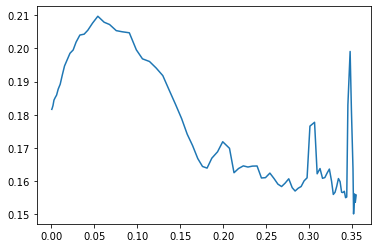

In [46]:
#Mechanical energy conservation
U = m*cte.g0*data.y
Kt = 0.5*m*data.v**2

def r(x):
    r = R.value - np.tan(the)*np.tan(psi)*x
    return r

Kr = 0.5*I*(data.v/r(data.x))**2

Em = U+Kt+Kr
plt.plot(data.x,Em)

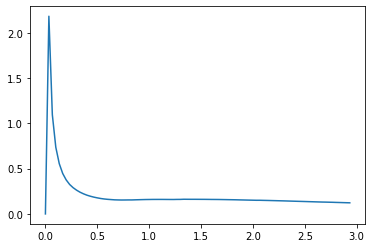

In [36]:
# vx=[0]
# vy=[0]
# vt=[]
# count = 1
# for x in data.x[1:]:
#     v = x/data.t[count]
#     vx.append(v)
#     count = count+1
# count = 1
# for y in data.y[1:]:
#     v = y/data.t[count]
#     vy.append(v)
#     count = count+1
# for i in range(0, len(vx), 1):
#     v = np.sqrt(vx[i]**2 + vy[i]**2)
#     vt.append(v)
# plt.plot(data.t, vt)

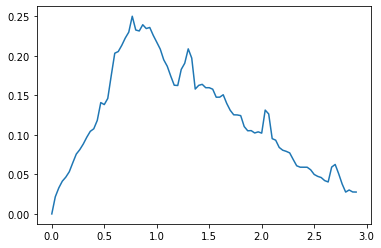

In [13]:
plt.plot(data.t, data.v)

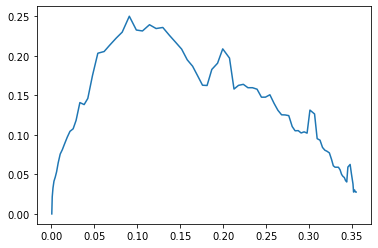

In [14]:
plt.plot(data.x,data.v)

# Theoretical Model


In [15]:
niu_k= 0.4

t_1 = np.linspace(0,2.4,50) * u.s
angle_1 = np.full(50,the)

In [16]:
def R(angle,times):
  X = 0.5*cte.g0*(np.sin(angle)-niu_k*np.cos(angle))*(times**2)
  
  return X

In [17]:
r_pos=R(angle_1, t_1)

In [18]:
x_pos=r_pos*np.cos(angle_1)
y_pos=r_pos*np.sin(angle_1)

In [19]:
y_pos

<Quantity [0.00000000e+00, 2.20099186e-04, 8.80396744e-04, 1.98089267e-03,
           3.52158698e-03, 5.50247965e-03, 7.92357070e-03, 1.07848601e-02,
           1.40863479e-02, 1.78280341e-02, 2.20099186e-02, 2.66320015e-02,
           3.16942828e-02, 3.71967624e-02, 4.31394405e-02, 4.95223168e-02,
           5.63453916e-02, 6.36086647e-02, 7.13121363e-02, 7.94558061e-02,
           8.80396744e-02, 9.70637410e-02, 1.06528006e-01, 1.16432469e-01,
           1.26777131e-01, 1.37561991e-01, 1.48787050e-01, 1.60452307e-01,
           1.72557762e-01, 1.85103415e-01, 1.98089267e-01, 2.11515318e-01,
           2.25381566e-01, 2.39688014e-01, 2.54434659e-01, 2.69621503e-01,
           2.85248545e-01, 3.01315786e-01, 3.17823225e-01, 3.34770862e-01,
           3.52158698e-01, 3.69986732e-01, 3.88254964e-01, 4.06963395e-01,
           4.26112024e-01, 4.45700852e-01, 4.65729878e-01, 4.86199102e-01,
           5.07108524e-01, 5.28458146e-01] m>

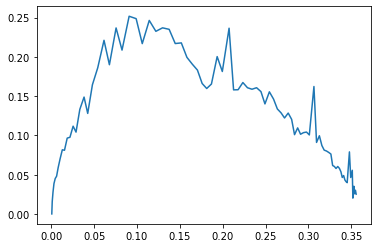

In [64]:
vx=np.array([0])
vy=np.array([0])
for i in range(1, len(data.x), 1):
    v = (data.x[i] - data.x[i-1])/(data.t[i] - data.t[i-1])
    vx = np.append(vx, [v])
for i in range(1, len(data.x), 1):
    v = (data.y[i] - data.y[i-1])/(data.t[i] - data.t[i-1])
    vy = np.append(vy, [v])
    
v = np.sqrt(vx**2 + vy**2)
plt.plot(data.x, v)

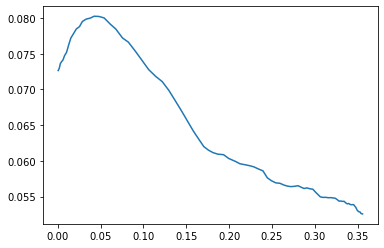

In [70]:
plt.plot(data.x,data.y)

In [71]:
np.sqrt(10*cte.g0*(data.y[0]-data.y[len(data.y)-1])*u.m/3*R**2)

<Quantity 0.03643459 m2 / s>